<a href="https://colab.research.google.com/github/Birjesh786/End-to-End-Machine-Learning-Models/blob/main/Job_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

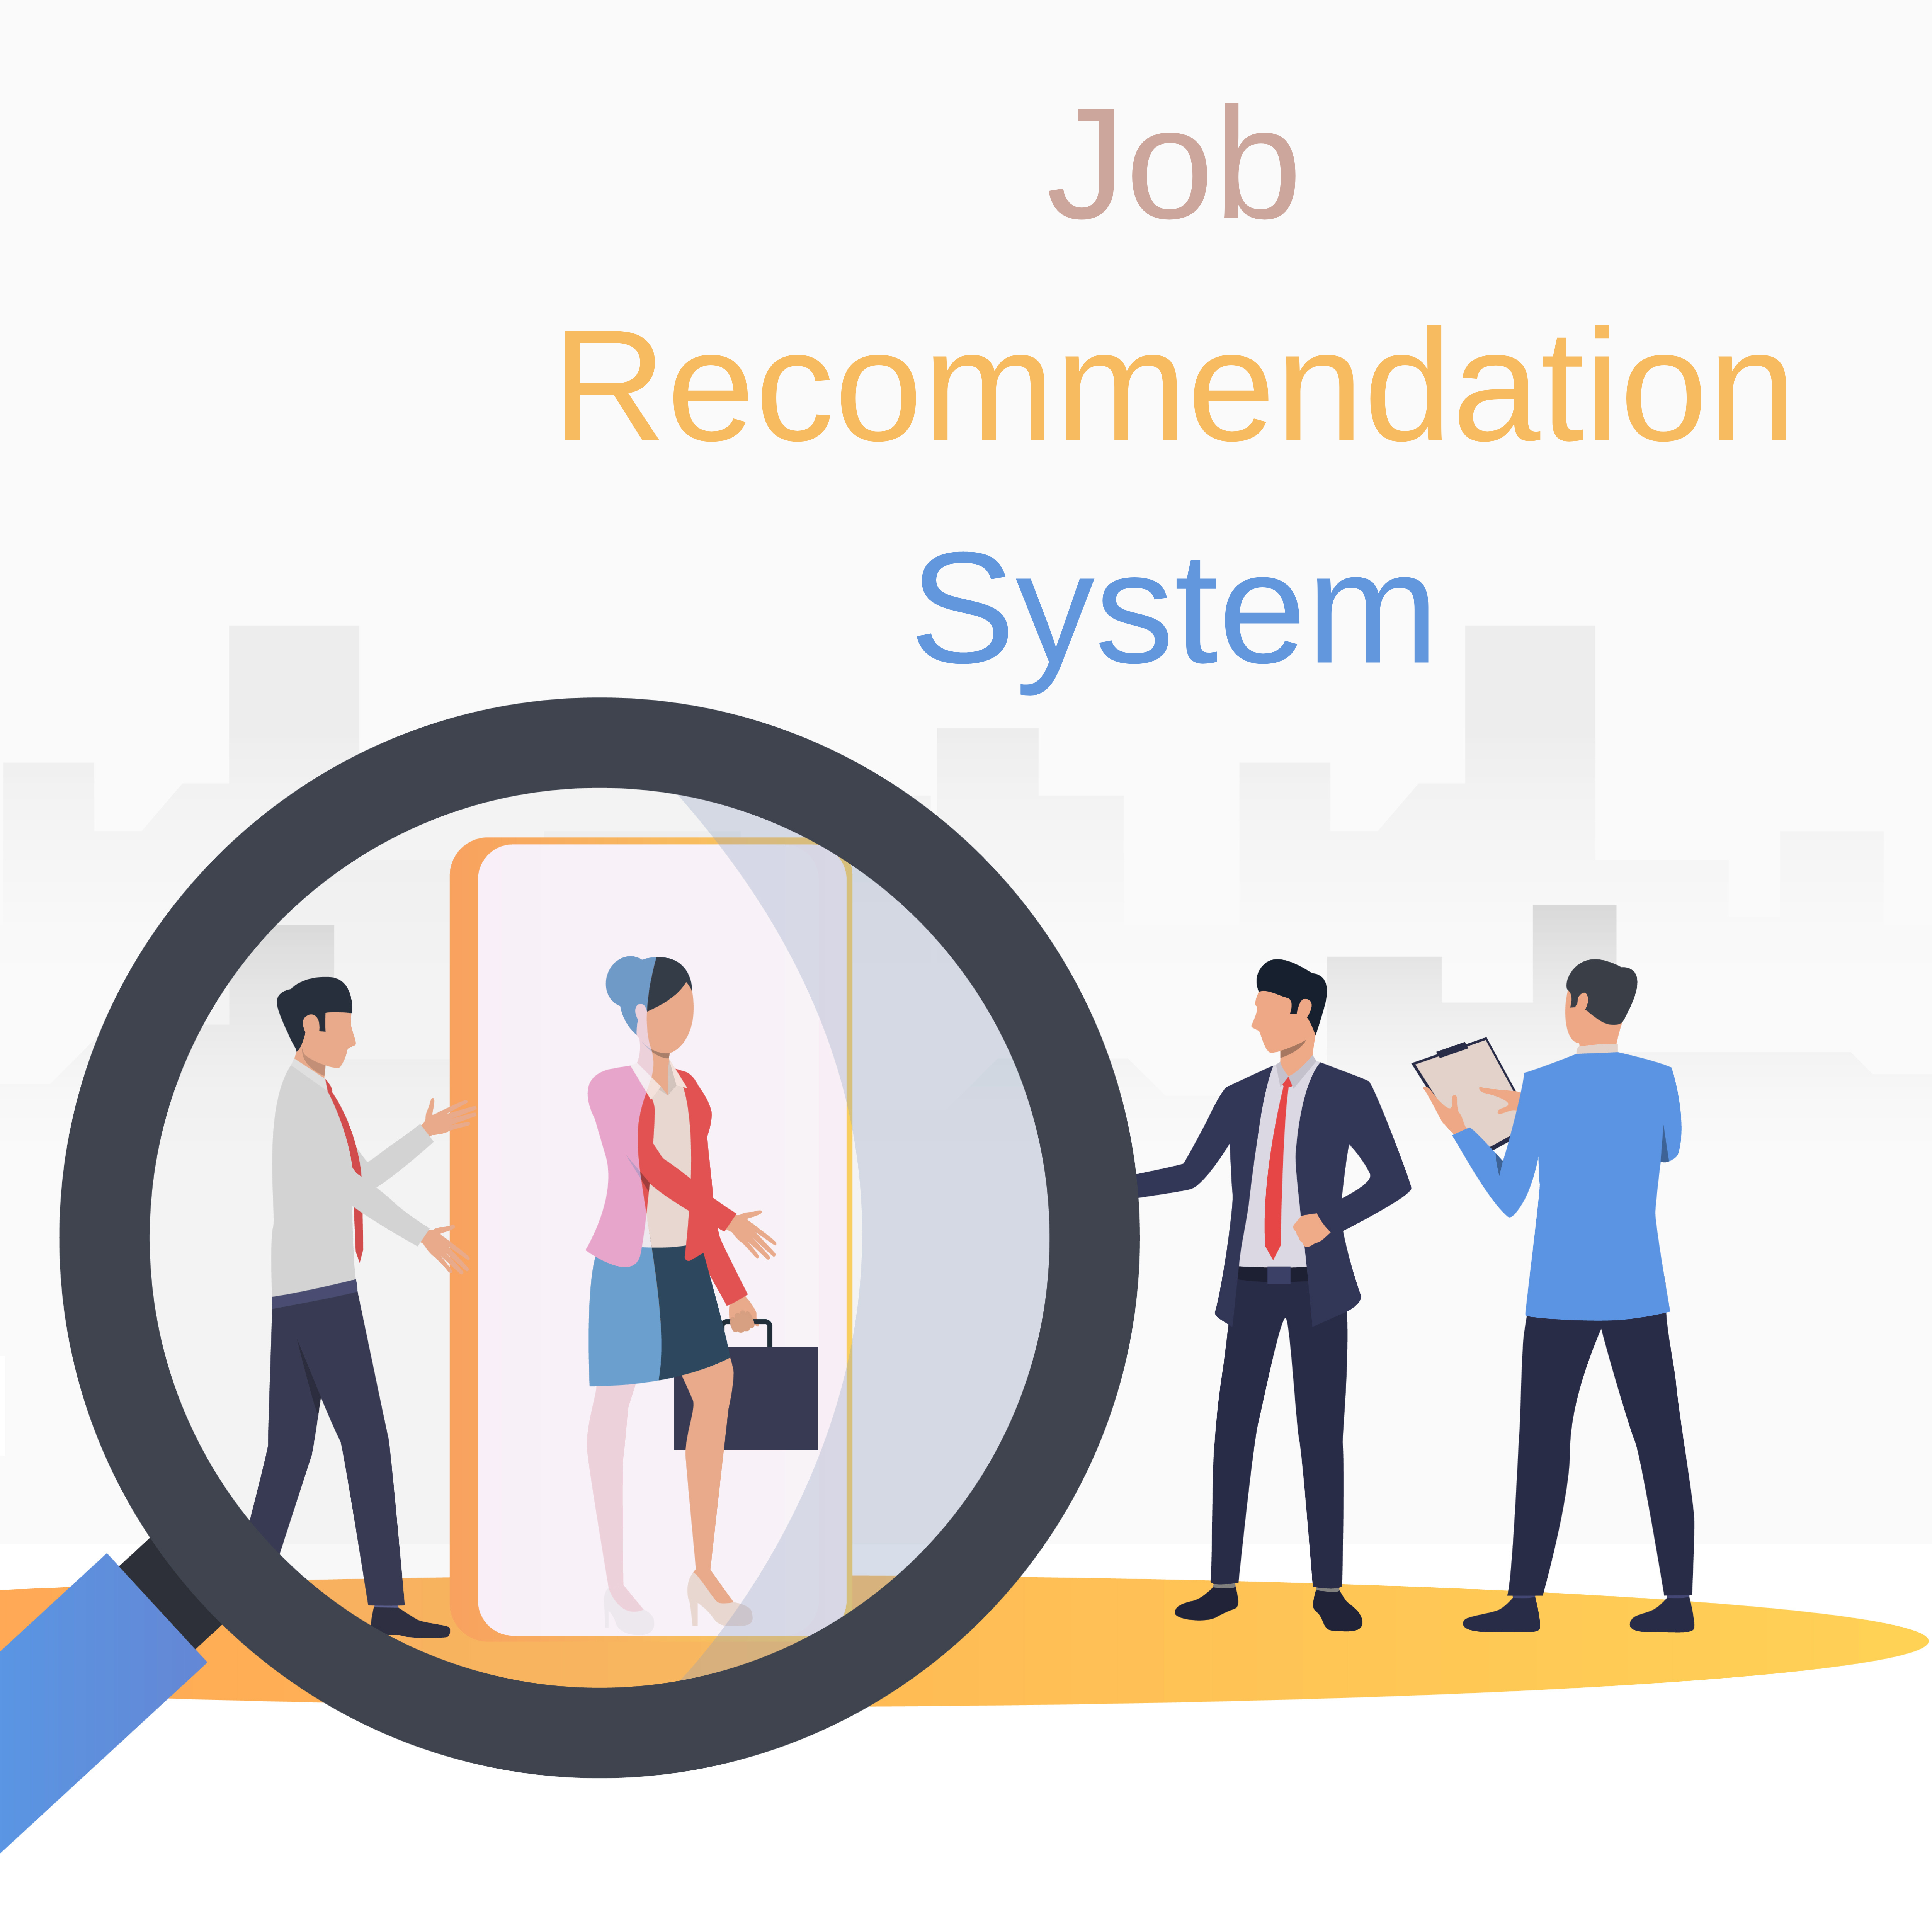

In [ ]:
#@title Default title text
from IPython.display import Image
Image('Job Recommendation System (1).png')

# Import the necessary libraries and Dataset

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string
import plotly.express as px
import seaborn as sns
import pandas as pd

In [ ]:
#Dataset
job_data = pd.read_csv("job.csv")

In [ ]:
job_data

,uniq id,crawl timestamp,job title,job salary,job experience required,key skills,role category,location,functional area,industry,role
0,9be62c49a0b7ebe982a4af1edaa7bc5f,2019-07-05 01:46:07 +0000,Digital Media Planner,Not Disclosed by Recruiter,5 - 10 yrs,Media Planning| Digital Media,Advertising,Mumbai,"Marketing , Advertising , MR , PR , Media Plan...","Advertising, PR, MR, Event Management",Media Planning Executive/Manager
1,3c52d436e39f596b22519da2612f6a56,2019-07-06 08:04:50 +0000,Online Bidding Executive,Not Disclosed by Recruiter,2 - 5 yrs,pre sales| closing| software knowledge| clien...,Retail Sales,"Pune,Pune","Sales , Retail , Business Development","IT-Software, Software Services",Sales Executive/Officer
2,ffad8a2396c60be2bf6d0e2ff47c58d4,2019-08-05 15:50:44 +0000,Trainee Research/ Research Executive- Hi- Tec...,Not Disclosed by Recruiter,0 - 1 yrs,Computer science| Fabrication| Quality check|...,R&D,Gurgaon,"Engineering Design , R&D","Recruitment, Staffing",R&D Executive
3,7b921f51b5c2fb862b4a5f7a54c37f75,2019-08-05 15:31:56 +0000,Technical Support,"2,00,000 - 4,00,000 PA.",0 - 5 yrs,Technical Support,Admin/Maintenance/Security/Datawarehousing,Mumbai,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Technical Support Engineer
4,2d8b7d44e138a54d5dc841163138de50,2019-07-05 02:48:29 +0000,Software Test Engineer -hyderabad,Not Disclosed by Recruiter,2 - 5 yrs,manual testing| test engineering| test cases|...,Programming & Design,Hyderabad,IT Software - QA & Testing,"IT-Software, Software Services",Testing Engineer
...,...,...,...,...,...,...,...,...,...,...,...
29995,3510f2146b514f112eaa9706a16b3900,2019-07-06 21:12:51 +0000,MTS-Software-Engineer,Not Disclosed by Recruiter,9 - 12 yrs,Graphics| C++| USB| Project management| SOC| ...,Programming & Design,Bengaluru,"IT Software - Embedded , EDA , VLSI , ASIC , C...","Semiconductors, Electronics",Software Developer
29996,4af8c56f5b4c535b1974065003f2d548,2019-08-05 23:55:08 +0000,Client Relationship Manager,Not Disclosed by Recruiter,1 - 5 yrs,Service delivery| LMS| CRE| Integration servi...,Operations,Chennai,"ITES , BPO , KPO , LPO , Customer Service , Op...","Education, Teaching, Training",Operations Manager
29997,43d5b806b26ed99d3ebfc8f366b4cdd1,2019-08-05 09:41:29 +0000,Assoc. Prof.- CS,Not Disclosed by Recruiter,4 - 6 yrs,Counselor| Mentor| Trainer| Advisor| Teaching,University Level,Howrah,"Teaching , Education , Training , Counselling","Education, Teaching, Training",Lecturer/Professor
29998,8bc87d14cf56564f16b6d4bae80180be,2019-08-06 01:44:55 +0000,Application/Cyber Security Specialist-Pune,Not Disclosed by Recruiter,5 - 10 yrs,Security Analysis| Software Development Life ...,Programming & Design,Pune,"IT Software - Application Programming , Mainte...","IT-Software, Software Services",Software Developer


In [ ]:
job_data.columns = [i.lower() for i in job_data.columns]
print("No of rows : ",job_data.shape[0])
print("No of cols : ",job_data.shape[1])

No of rows :  30000
No of cols :  11


In [ ]:
#Missing values
fig = px.bar(job_data.isnull().sum(), 
             labels={'value': 'Missing Values Count', 'index': 'Columns'},
             title='Missing Values Count for Each Column')
fig.show()

In [ ]:
#Columns
job_data.columns

Index(['uniq id', 'crawl timestamp', 'job title', 'job salary',
       'job experience required', 'key skills', 'role category', 'location',
       'functional area', 'industry', 'role'],
      dtype='object')

In [ ]:
# Dropping rows with missing values
job_data.dropna(how='any', axis=0, inplace=True)

# Checking if the DataFrame still has any missing values
if job_data.isnull().sum().sum() == 0:
    print("No missing values in the DataFrame")

# Dropping unwanted columns
job_data.drop(['uniq id', 'crawl timestamp'], axis=1, inplace=True)

# Printing the number of records after dropping rows and the final number of columns
print("Number of records in the DataFrame after dropping rows with missing values:", job_data.shape[0])
print("Number of columns in the DataFrame after dropping unwanted columns:", job_data.shape[1])


No missing values in the DataFrame
Number of records in the DataFrame after dropping rows with missing values: 27005
Number of columns in the DataFrame after dropping unwanted columns: 9


#Explore the data

In [ ]:
job_title = job_data['job title'].value_counts().nlargest(n=10)
fig = px.bar(y=job_title.values,
       x=job_title.index,
       orientation='v',
       color=job_title.index,
       text=job_title.values,
       color_discrete_sequence= px.colors.qualitative.Bold)

fig.update_traces(texttemplate='%{text:.2s}', 
                  textposition='outside', 
                  marker_line_color='rgb(8,48,107)', 
                  marker_line_width=1.5, 
                  opacity=0.7)

fig.update_layout(width=2000, 
                  showlegend=False, 
                  xaxis_title="job title",
                  yaxis_title="Count",
                  title="Top 10 Job Title by job count")
fig.show()

In [ ]:
location = job_data['location'].value_counts().nlargest(n=10)
fig = px.bar(y=location.values,
       x=location.index,
       orientation='v',
       color=location.index,
       text=location.values,
       color_discrete_sequence= px.colors.qualitative.Bold)

fig.update_traces(texttemplate='%{text:.2s}', 
                  textposition='outside', 
                  marker_line_color='rgb(8,48,107)', 
                  marker_line_width=1.5, 
                  opacity=0.7)

fig.update_layout(width=2000, 
                  showlegend=False, 
                  xaxis_title="City",
                  yaxis_title="Count",
                  title="Top 10 cities by job count")
fig.show()

In [ ]:
# Assuming job_data is a pandas DataFrame containing job postings data
top_skills = job_data['key skills'].value_counts().head(10)

fig = px.pie(values=top_skills.values, names=top_skills.index, 
             title="Top 10 in Demand Key Skills", hole=0.6)

fig.show()

In [ ]:
# Assuming job_data is a pandas DataFrame containing job postings data
names = job_data['job experience required'].value_counts().head(10).index
values = job_data['job experience required'].value_counts().head(10).values

fig = px.pie(job_data, values=values, names=names, 
             title='Job availability with respect to job experience',
             hole=0.6)

fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()

In [ ]:
job = job_data["job title"].value_counts()
job_df = pd.DataFrame({"job_title":job.index,"frequency":job.values})

exper = job_data["job experience required"].value_counts()
exper_df = pd.DataFrame({"experience":exper.index,"frequency":exper.values})

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objs as go
fig = make_subplots(1,2, 
                    subplot_titles = ["Most Prefered Job Tile", 
                                      "Expected Job experience"])
fig.append_trace(go.Bar(x=job_df["frequency"][:15],
                       y=job_df["job_title"][:15],
                       orientation='h',showlegend=False,
                       marker=dict(color=job_df["frequency"][:15], coloraxis="coloraxis", showscale=False, colorscale='rdgy')),row=1,col=1)


fig.append_trace(go.Bar(x=exper_df["frequency"][:15],
                       y=exper_df["experience"][:15],
                       orientation="h",
                       marker=dict(color=exper_df["frequency"][:15], coloraxis="coloraxis", showscale=False, colorscale='rdgy')),row=1,col=2)

fig.update_layout(coloraxis=dict(colorscale='edge'))

fig.show()

In [ ]:
# Assuming job_data is a pandas DataFrame containing job postings data

top_roles = job_data['role category'].value_counts().head(10)
fig = px.pie(values=top_roles.values, names=top_roles.index, 
             title="Top 10 Role Categories", hole=0.5)

fig.update_traces(textposition='inside',  
                  opacity=0.9)

fig.show()

#Location wise analysis

In [ ]:
mumbai = job_data[job_data["location"]=="Mumbai"]
Pune = job_data[job_data["location"]=="Pune"]
Bengaluru = job_data[job_data["location"]=="Bengaluru"]
Hyderabad = job_data[job_data["location"]=="Hyderabad"]
Chennai = job_data[job_data["location"]=="Chennai"]

In [ ]:
import plotly.graph_objs as go

# Mumbai job data
mumbai_job = mumbai["job title"].value_counts()
mumbai_job_df = pd.DataFrame({
    "title":mumbai_job.index,
    "frequency":mumbai_job.values
})
mumbai_job_df = mumbai_job_df[:20]
mumbai_job_df["color"] = pd.factorize(mumbai_job_df["title"])[0]

# Bengaluru job data
bengaluru_job = Bengaluru["job title"].value_counts()
bengaluru_job_df = pd.DataFrame({
    "title":bengaluru_job.index,
    "frequency":bengaluru_job.values
})
bengaluru_job_df = bengaluru_job_df[:20]
bengaluru_job_df["color"] = pd.factorize(bengaluru_job_df["title"])[0]

# Pune job data
pune_job = Pune["job title"].value_counts()
pune_job_df = pd.DataFrame({
    "title":pune_job.index,
    "frequency":pune_job.values
})
pune_job_df = pune_job_df[:20]
pune_job_df["color"] = pd.factorize(pune_job_df["title"])[0]

# Chennai job data
chennai_job = Chennai["job title"].value_counts()
chennai_job_df = pd.DataFrame({
    "title":chennai_job.index,
    "frequency":chennai_job.values
})
chennai_job_df = chennai_job_df[:20]
chennai_job_df["color"] = pd.factorize(chennai_job_df["title"])[0]

# Create subplots
fig = make_subplots(rows=2, cols=2, subplot_titles=("Job availability in Mumbai", "Job availability in Bengaluru", "Job availability in Pune", "Job availability in Chennai"))

# Add Mumbai bar chart to subplot
fig.add_trace(
    go.Bar(x=mumbai_job_df["frequency"], y=mumbai_job_df["title"], marker=dict(color=mumbai_job_df["color"]), orientation="h"),
    row=1, col=1
)

# Add Bengaluru bar chart to subplot
fig.add_trace(
    go.Bar(x=bengaluru_job_df["frequency"], y=bengaluru_job_df["title"], marker=dict(color=bengaluru_job_df["color"]), orientation="h"),
    row=1, col=2
)

# Add Pune bar chart to subplot
fig.add_trace(
    go.Bar(x=pune_job_df["frequency"], y=pune_job_df["title"], marker=dict(color=pune_job_df["color"]), orientation="h"),
    row=2, col=1
)

# Add Chennai bar chart to subplot
fig.add_trace(
    go.Bar(x=chennai_job_df["frequency"], y=chennai_job_df["title"], marker=dict(color=chennai_job_df["color"]), orientation="h"),
    row=2, col=2
)

# Update layout
fig.update_layout(height=1000, width=2300, title="Job availability in major cities of India")

# Show plot
fig.show()


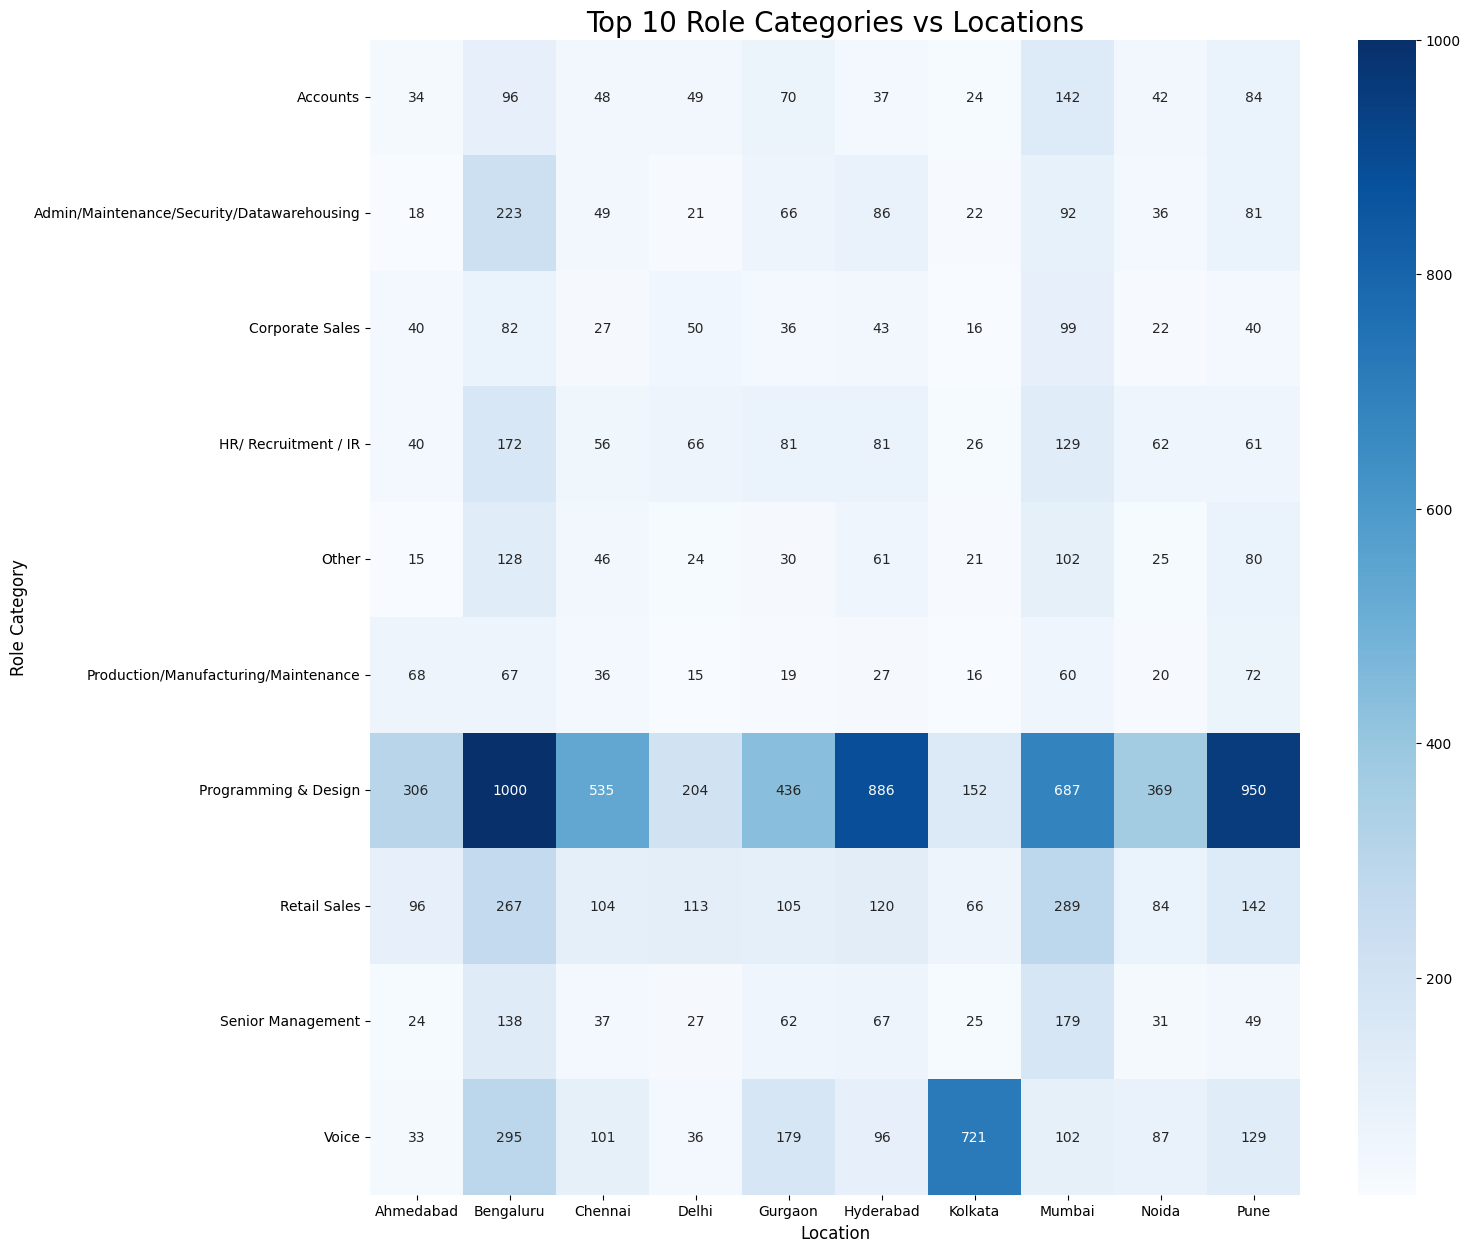

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 10 role categories and locations by count
roles = job_data['role category'].value_counts()[:10].index
locs = job_data['location'].value_counts()[:10].index

# Group the data by role category and location, and get the count
df1 = job_data[(job_data['role category'].isin(roles)) & (job_data['location'].isin(locs))].groupby(
    ['role category', 'location']).size().reset_index(name='count')

# Pivot the data to create a matrix of counts
df1 = df1.pivot(index='role category', columns='location', values='count').fillna(0)

# Replace counts greater than 1000 with 1000
df1 = df1.applymap(lambda x: 1000 if x > 1000 else x)

# Create the heatmap with values added
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df1, annot=True, fmt='.0f', cmap='Blues', ax=ax)
ax.set_title('Top 10 Role Categories vs Locations', fontsize=20)
ax.set_xlabel('Location', fontsize=12)
ax.set_ylabel('Role Category', fontsize=12)
plt.show()

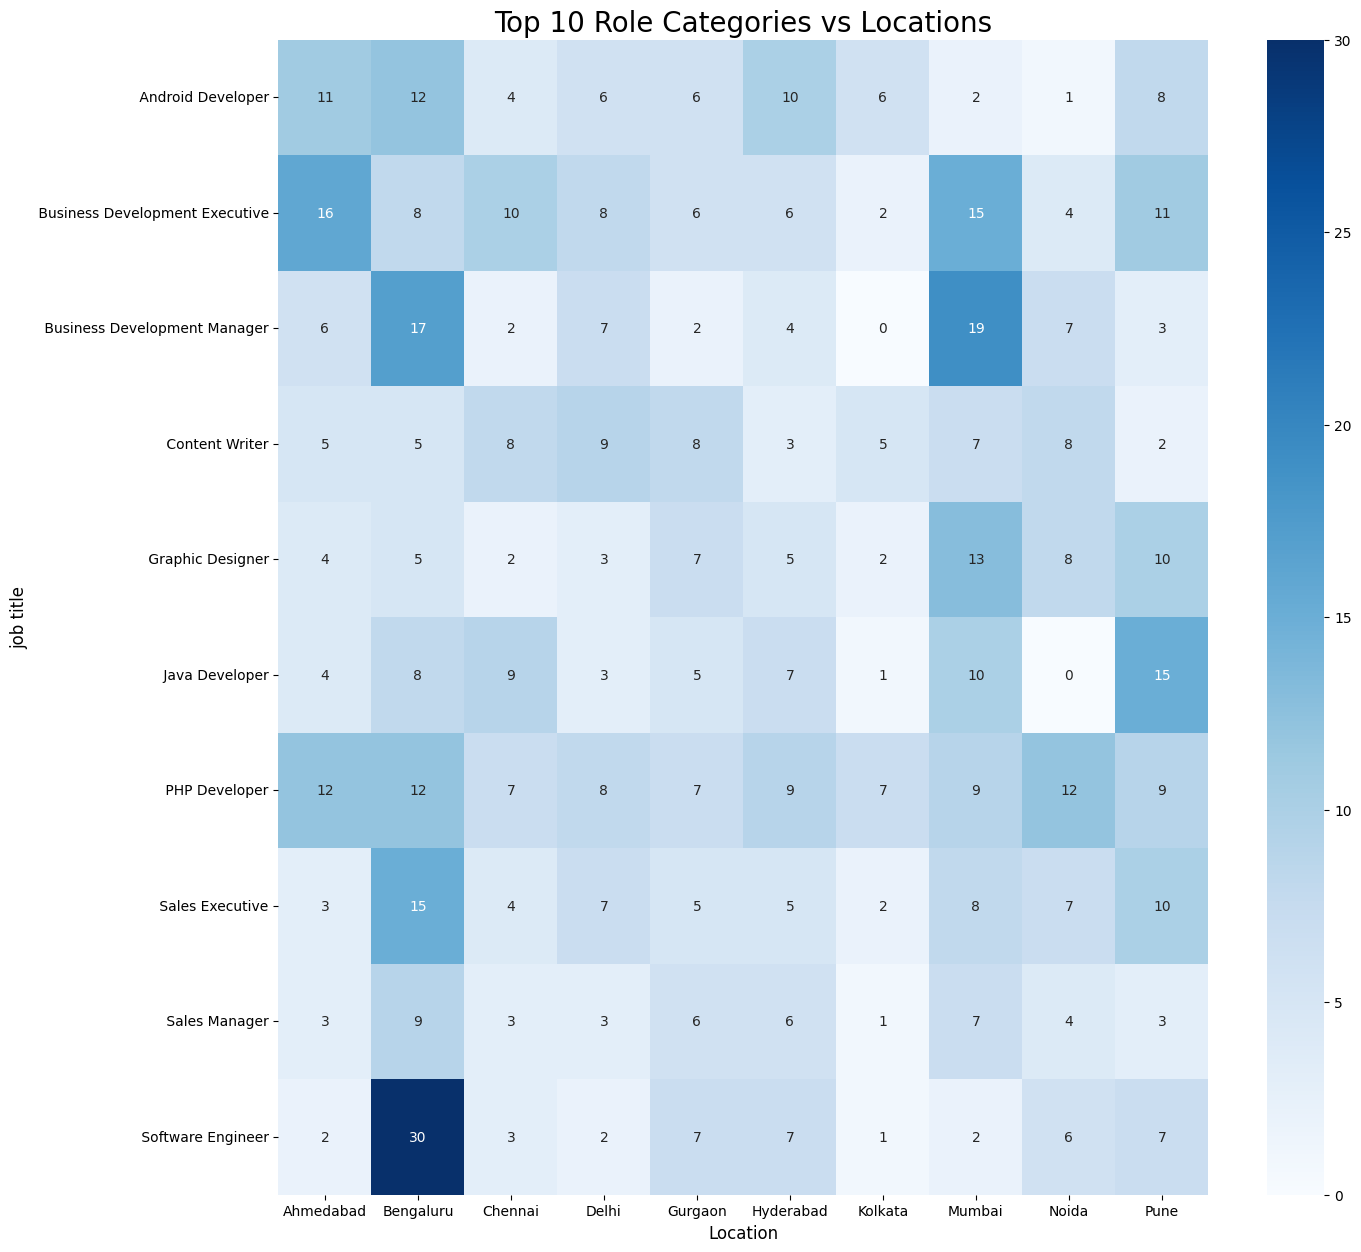

In [ ]:
# Get the top 10 job title and locations by count
roles = job_data['job title'].value_counts()[:10].index
locs = job_data['location'].value_counts()[:10].index

# Group the data by job title and location, and get the count
df1 = job_data[(job_data['job title'].isin(roles)) & (job_data['location'].isin(locs))].groupby(
    ['job title', 'location']).size().reset_index(name='count')

# Pivot the data to create a matrix of counts
df1 = df1.pivot(index='job title', columns='location', values='count').fillna(0)

# Replace counts greater than 1000 with 1000
df1 = df1.applymap(lambda x: 1000 if x > 1000 else x)

# Create the heatmap with values added
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df1, annot=True, fmt='.0f', cmap='Blues', ax=ax)
ax.set_title('Top 10 Role Categories vs Locations', fontsize=20)
ax.set_xlabel('Location', fontsize=12)
ax.set_ylabel('job title', fontsize=12)
plt.show()

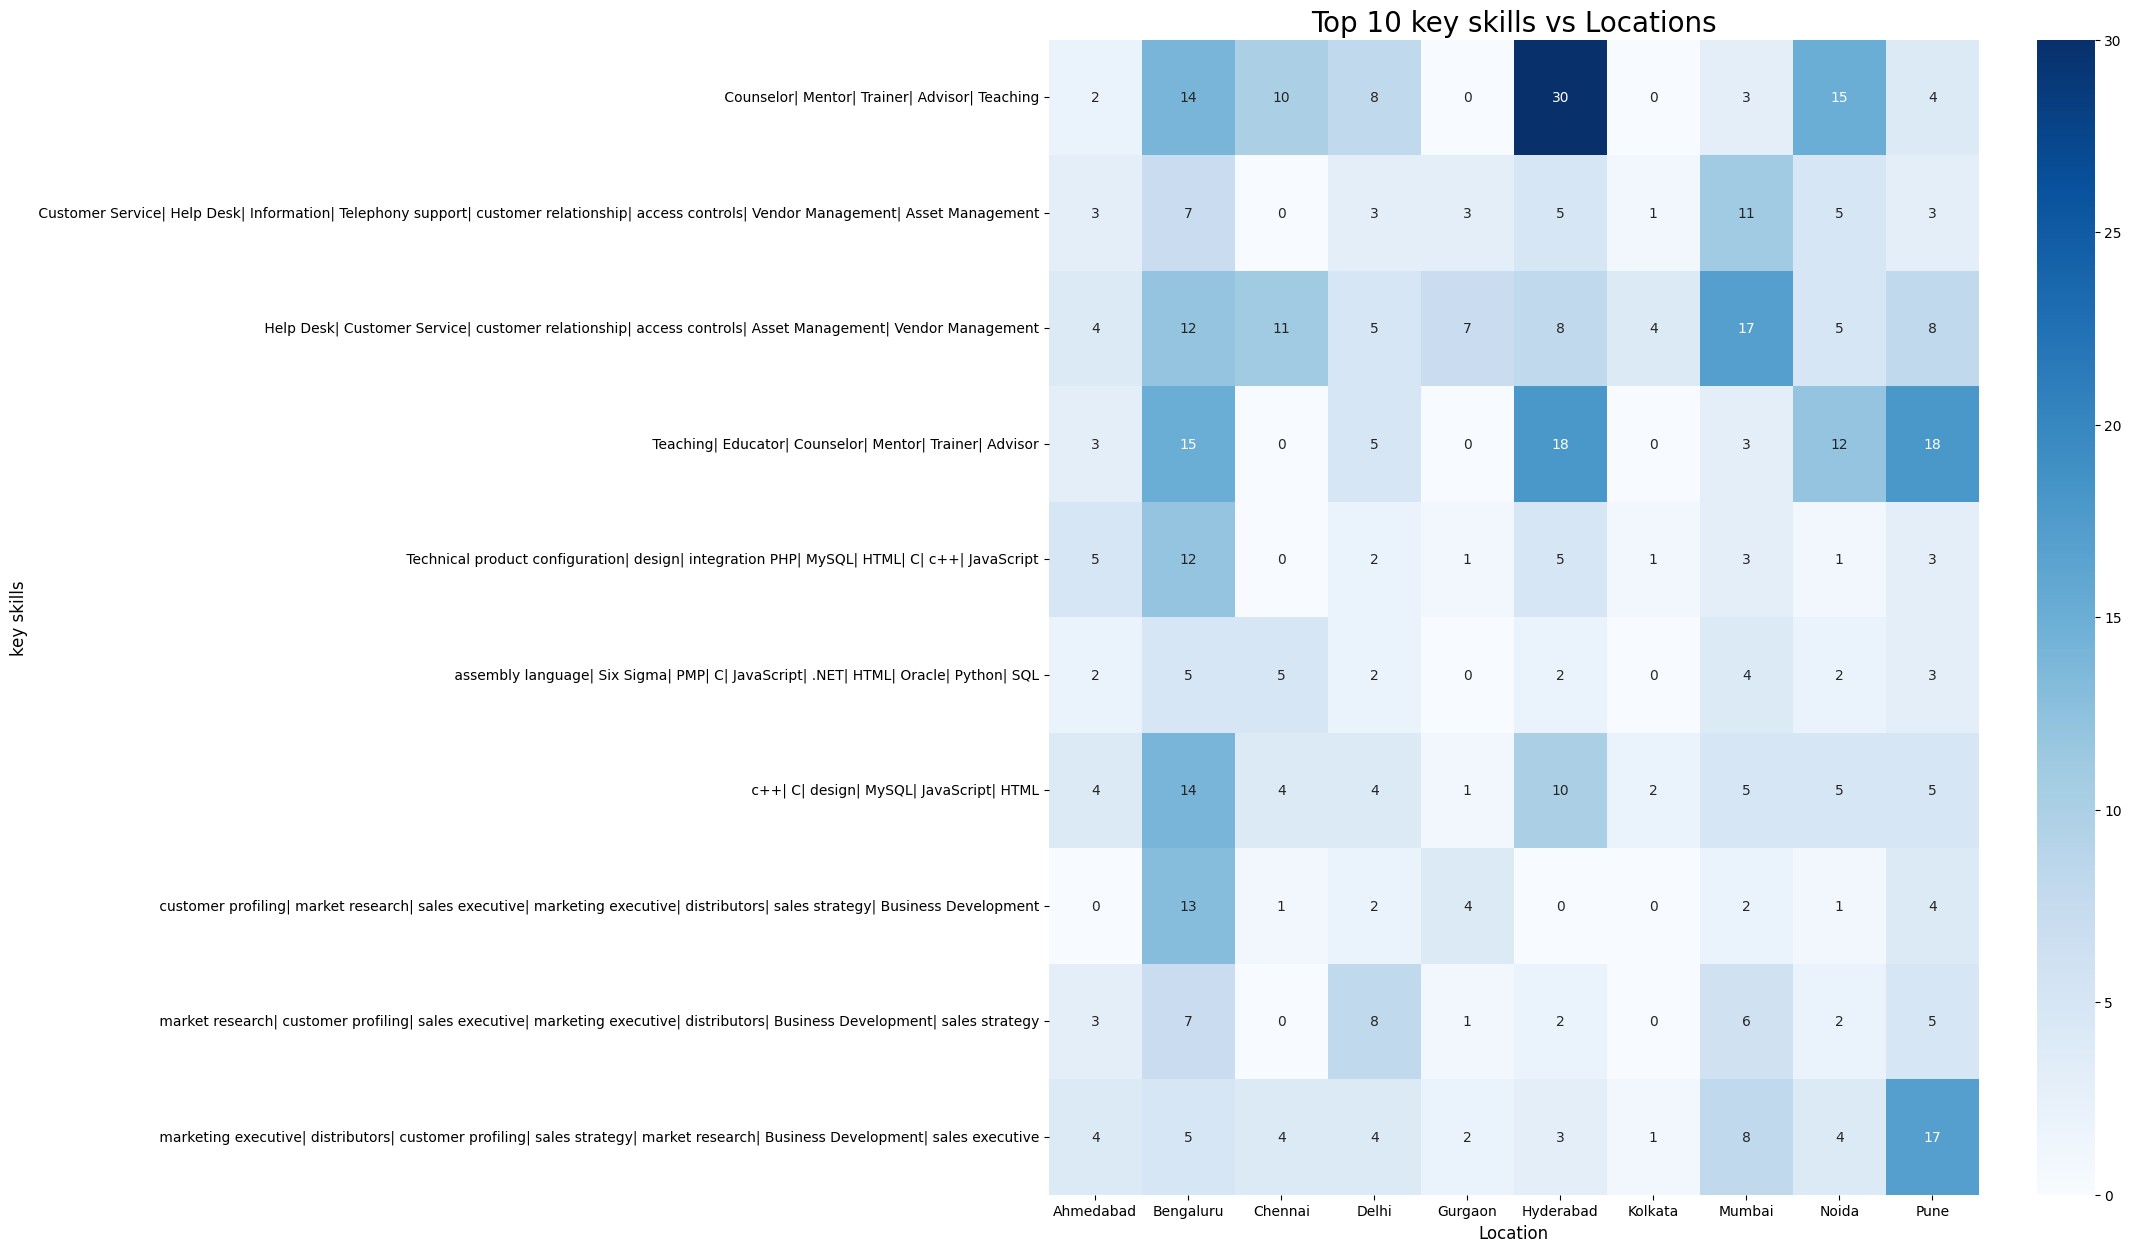

In [ ]:
# Get the top 10 key skills and locations by count
roles = job_data['key skills'].value_counts()[:10].index
locs = job_data['location'].value_counts()[:10].index

# Group the data by key skills and location, and get the count
df1 = job_data[(job_data['key skills'].isin(roles)) & (job_data['location'].isin(locs))].groupby(
    ['key skills', 'location']).size().reset_index(name='count')

# Pivot the data to create a matrix of counts
df1 = df1.pivot(index='key skills', columns='location', values='count').fillna(0)

# Replace counts greater than 1000 with 1000
df1 = df1.applymap(lambda x: 1000 if x > 1000 else x)

# Create the heatmap with values added
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df1, annot=True, fmt='.0f', cmap='Blues', ax=ax)
ax.set_title('Top 10 key skills vs Locations', fontsize=20)
ax.set_xlabel('Location', fontsize=12)
ax.set_ylabel('key skills', fontsize=12)
plt.show()

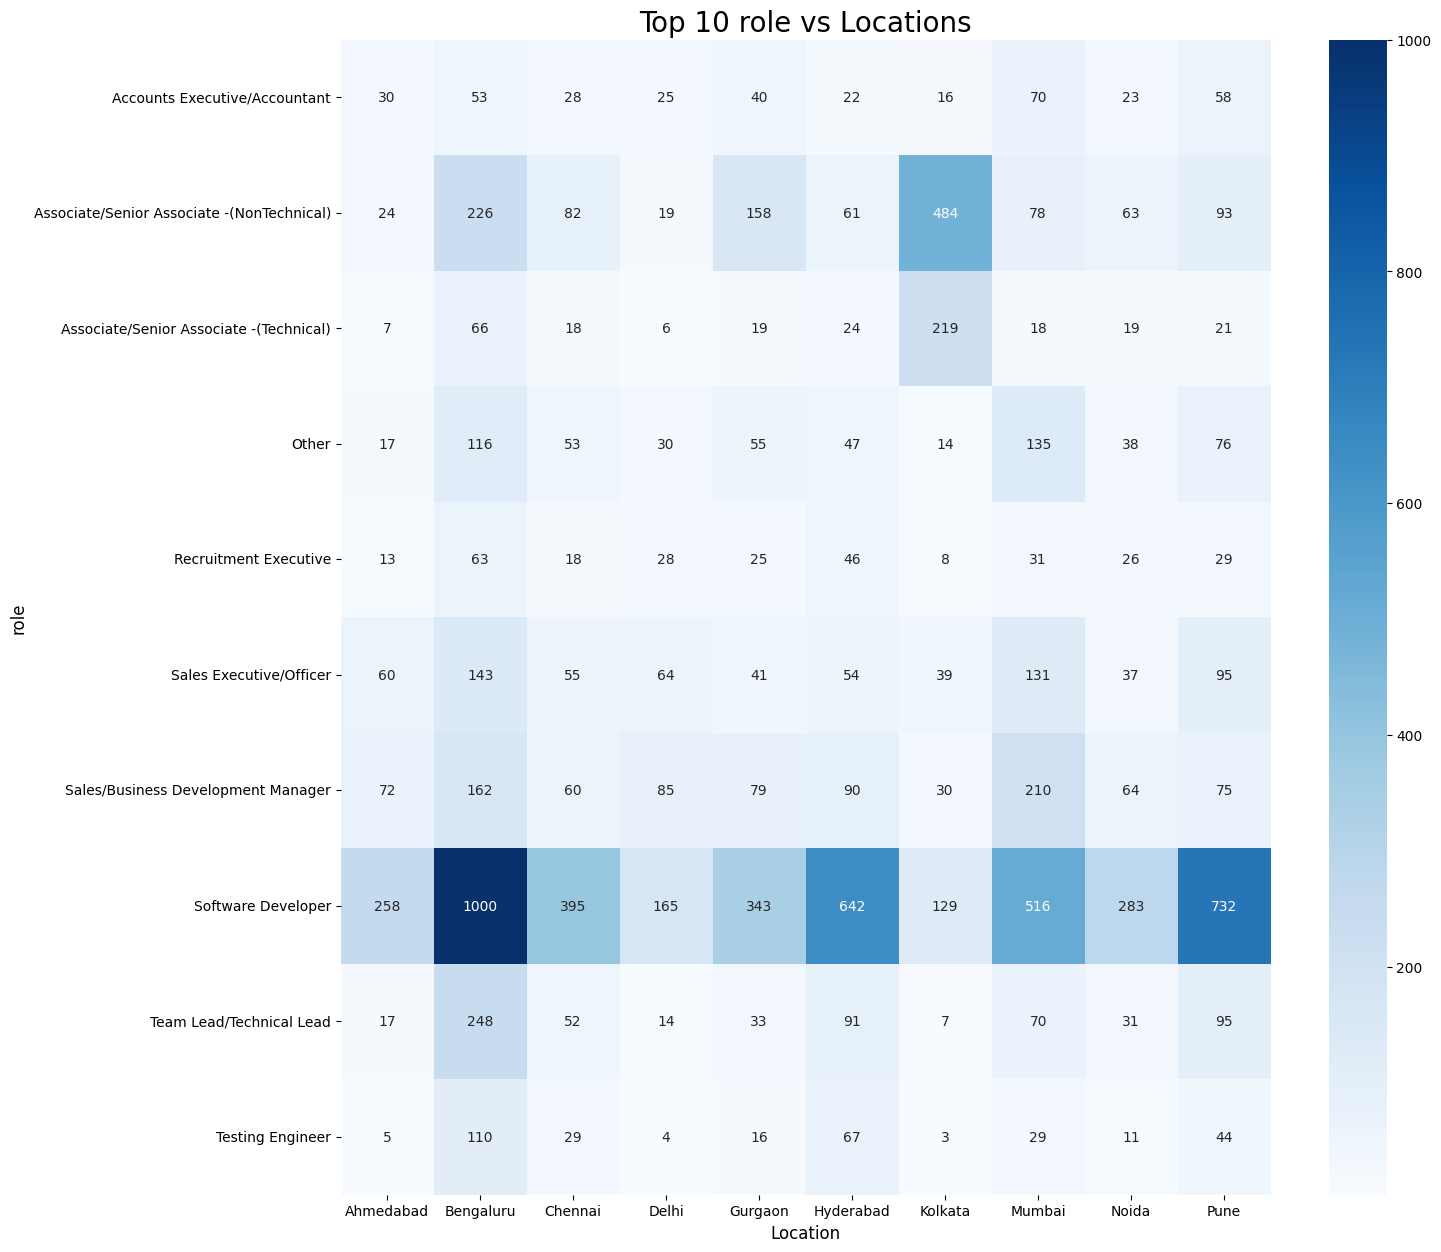

In [ ]:
# Get the top 10 role and locations by count
roles = job_data['role'].value_counts()[:10].index
locs = job_data['location'].value_counts()[:10].index

# Group the data by role and location, and get the count
df1 = job_data[(job_data['role'].isin(roles)) & (job_data['location'].isin(locs))].groupby(
    ['role', 'location']).size().reset_index(name='count')

# Pivot the data to create a matrix of counts
df1 = df1.pivot(index='role', columns='location', values='count').fillna(0)

# Replace counts greater than 1000 with 1000
df1 = df1.applymap(lambda x: 1000 if x > 1000 else x)

# Create the heatmap with values added
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df1, annot=True, fmt='.0f', cmap='Blues', ax=ax)
ax.set_title('Top 10 role vs Locations', fontsize=20)
ax.set_xlabel('Location', fontsize=12)
ax.set_ylabel('role', fontsize=12)
plt.show()

In [ ]:
# Filter the data to include only job salaries in per annum (PA) format
df = job_data['job salary'].dropna().reset_index()
df = df[df['job salary'].str.contains('PA')]

# Get the top 10 most common job salaries
df = df['job salary'].value_counts().reset_index().head(10)

# Create the bar chart using Plotly
fig = px.bar(data_frame=df, x='job salary', y='index', orientation='h',
             color='job salary', color_continuous_scale='delta',
             title='Top 10 Most Common Job Salaries')

fig.update_layout(xaxis_title='', yaxis_title='JOB SALARIES')
fig.show()

#It's time model building

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

job_data = pd.read_csv("job.csv")

# Join all strings in the list into a single string
feature = [' '.join(str(s).split('|')) if isinstance(s, str) else '' for s in job_data["Key Skills"].tolist()]

# Create TfidfVectorizer object with the preprocessed text
tfidf = TfidfVectorizer(stop_words="english")
tfidf_matrix = tfidf.fit_transform(feature)
similarity = cosine_similarity(tfidf_matrix)

indices = pd.Series(job_data.index, index=job_data['Job Title']).drop_duplicates()

def jobs_recommendation(title, similarity=similarity):
    index = indices[title]
    similarity_scores = list(enumerate(similarity[index]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    similarity_scores = similarity_scores[1:6]
    news_indices = [i[0] for i in similarity_scores]
    return job_data[['job title', 'job experience required', 'key skills']].iloc[news_indices]

print(jobs_recommendation("Digital Media Planner"))
